# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats
from scipy.stats import norm

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


## Question 1: Is the distribution of body temperatures normal?

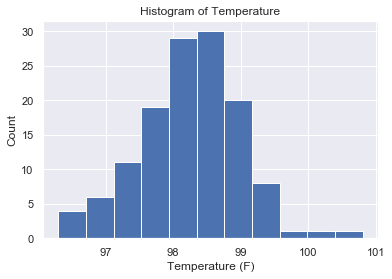

In [5]:
sb.set()
bins = int(np.sqrt(len(df.temperature)))
_ = plt.hist(x='temperature', data=df, bins=bins)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Count')
_ = plt.title(s='Histogram of Temperature')
plt.show()

From the graph it looks like the distribution is approximately normal. The data isn't skewed towards any side and is centered in the middle. 

## Question 2: Is the sample size large? Are the observations independent?

In [6]:
len(df.temperature)

130

The sample size is large; it has 130 data points. It is also safe to say that the observations are independent because the sample size is less than 10% of the population. 

## Question 3: Is the true population mean really 98.6 degrees F?

In [7]:
np.mean(df.temperature)

98.24923076923078

Population mean is approximately 98.25. 

#### First, try a bootstrap hypothesis test.

**Null Hypothesis:** The true mean temperature is 98.6 in dataset. 
**Alternative Hypothesis:** The true mean temperature is not 98.6. 

In [8]:
mean_temp = 98.6 
df_temp_shifted = df.temperature - np.mean(df.temperature) + mean_temp
print(np.mean(df_temp_shifted))

98.59999999999992


In [9]:
def diff_mean(data, mean_temp=98.6):
    """Calculates difference of mean"""
    return mean_temp - np.mean(data)

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

In [10]:
mean_diff = diff_mean(data=df.temperature, mean_temp=98.6)
bs_reps = draw_bs_reps(data=df_temp_shifted, func=diff_mean, size=500)
p_value = np.sum(bs_reps <= mean_diff)/len(bs_reps)

#### Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

I would use a one-sample test because we are looking at differenece between sample mean and population mean. A two-sample test would require a second set of temperature data to be compared with. 

#### In this situation, is it appropriate to use the  t or  z  statistic?

In this situation it is appropriate to use the z statistic because we have a sample size of 130. We don't know the population standard deviation so we will estimate it using the standard error. 

In [11]:
sample_mean = np.mean(df.temperature)
std = np.std(df.temperature)
n = len(df.temperature)

print("The mean is: {}".format(sample_mean))
print("The standard error is: {}".format(std))
print("The sample size is: {}".format(n))

The mean is: 98.24923076923078
The standard error is: 0.7303577789050377
The sample size is: 130


In [12]:
# Calculating z-statistic
z = (sample_mean - mean_temp)/(std/np.sqrt(n))
print("The z-score is: {}".format(z))

The z-score is: -5.475925202078116


In [13]:
alpha = 0.05 

p_value = scipy.stats.norm.cdf(x=z)*2

print("The p-value is: {}".format(p_value))

if p_value <= alpha:
    print("Reject the null hypothesis. There is a difference between the mean temperature and population mean temperature.")

if p_value > alpha:
    print("Fail to reject the null hypothesis.")

The p-value is: 4.3523151658821886e-08
Reject the null hypothesis. There is a difference between the mean temperature and population mean temperature.


#### Now try using the other test. How is the result be different? Why?

In [14]:
scipy.stats.ttest_1samp(a=df.temperature, popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

## Question 4: Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [15]:
sample = np.random.choice(a=df.temperature, size=10)
sample_mean = np.mean(sample)
std = np.std(a=sample)
n = len(sample)

print("The mean is: {}".format(sample_mean))
print("The standard error is: {}".format(std))
print("The sample size is: {}".format(n))

The mean is: 98.16
The standard error is: 0.5553377350765921
The sample size is: 10


**z Test**

In [16]:
z = (sample_mean - 98.6)/(std/np.sqrt(n))

p_value = scipy.stats.norm.cdf(x=z)*2

print("The z-score is: {}".format(z))
print("The p-value is: {}".format(p_value))

if p_value <= alpha:
    print("Reject the null hypothesis. There is a difference between the mean temperature and population mean temperature.")

if p_value > alpha:
    print("Fail to reject the null hypothesis.")

The z-score is: -2.5055062578849925
The p-value is: 0.012227623451852724
Reject the null hypothesis. There is a difference between the mean temperature and population mean temperature.


**t Test**

In [17]:
scipy.stats.ttest_1samp(a=sample, popmean=98.6)

Ttest_1sampResult(statistic=-2.3769319400165356, pvalue=0.04143553568792729)

#### Which one is the correct one to use?

The correct one to use is the t test. The t test is used in cases where the sample size is small.
In order to use the z test, the sample size has to be larger than 30 because the distribution is then approximatley 
normal.

#### What do you notice? What does this tell you about the difference in application of the  t and  z  statistic?

The p-value is much larger when using the z statistic. This tells me that difference in applying the t and z statistic lies in the sample size. 

## Question 5: At what temperature should we consider someone's temperature to be "abnormal"?

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [18]:
se = np.std(df.temperature)/np.sqrt(len(df.temperature))
z_cr = scipy.stats.norm.ppf(q=0.975)
margin_of_error = z_cr * se

bs_reps = draw_bs_reps(data=df.temperature, func=np.mean, size=10000)

ci_95 = np.percentile(a=bs_reps, q=[2.5, 97.5])

print("The margin of error is: {}".format(margin_of_error))
print("The 95% confidence interval is : {}".format(ci_95))

The margin of error is: 0.12554865777413815
The 95% confidence interval is : [98.12536538 98.37538462]


Anything below 98.12 and above 98.37 would be considered an "abnormal" temperature according to this dataset. 

### Question 6: Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

In [19]:
male = df.loc[df.gender=='M']
female = df.loc[df.gender=='F']

In [20]:
male.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [21]:
female.describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


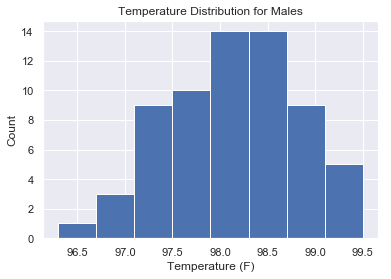

In [22]:
_ = plt.hist(x='temperature', bins=int(np.sqrt(len(male.temperature))), data=male)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Count')
_ = plt.title('Temperature Distribution for Males')
plt.show()

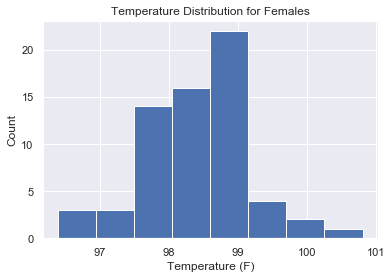

In [23]:
_ = plt.hist(x='temperature', bins=int(np.sqrt(len(female.temperature))), data=female)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Count')
_ = plt.title('Temperature Distribution for Females')
plt.show()

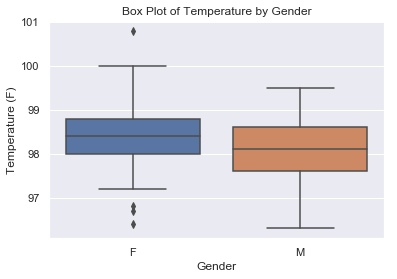

In [24]:
_ = sb.boxplot(x='gender', y='temperature', data=df)
_ = plt.xlabel('Gender')
_ = plt.ylabel('Temperature (F)')
_ = plt.title('Box Plot of Temperature by Gender')
plt.show()

Since we have to groups of temperature data that we are comparing, it is best to use a 2-sample z test. 

**Null Hypothesis:** There is no difference between male mean temperature and female mean temperature.
<p> </p>

**Alternative Hypothesis:** There is a difference between male mean temperature and female mean temperature.

In [25]:
se_male = np.std(male.temperature)/np.sqrt(len(male.temperature))
se_female = np.std(female.temperature)/np.sqrt(len(female.temperature))

z = ((np.mean(male.temperature) - np.mean(female.temperature)) - 0)/(np.sqrt(se_male**2 + se_female**2))

p_value = scipy.stats.norm.cdf(x=z)*2
print("The z-score is: {}".format(z))
print("The p-value is: {}".format(p_value))
if p_value <= alpha:
    print("Reject the null hypothesis. There is a difference between the mean male temperature and population mean female temperature.")

if p_value > alpha:
    print("Fail to reject the null hypothesis.")

The z-score is: -2.3032202891940123
The p-value is: 0.02126645183012935
Reject the null hypothesis. There is a difference between the mean male temperature and population mean female temperature.


## Conclusion

For this project, we explored the differences in mean temperature from a group of people. The original question was about if there was a significant difference between males and females in normal temperature. The null hypothesis was that there is no difference in temperature between males and females. After, conducting the two-sample z test, the z-score was -2.3 and the p-value was 0.021. The significance level set before the test was 5%. Since, the p-value was less than the significance level, the null hypothesis was rejected in favor of our alternative hypothesis. The test showed that their is a difference in temperature between males and females. To ascertain if this is true, a bigger sample should be collected. Additionally, there does seem to be some outliers, according to the box plot.